In [5]:
# Introduction:
# The datasets used are Portuguese” Vinho Verde” wines. Red wine and has 1599 different varieties, 
# and white wine and has 4898 varieties. 11 physicochemical properties are collected for each wine 
# and are continuous variables. The ordinal variable, a quality, gives the ranking from 1 (worst) to 10 (best).
# This project aims to predict the quality of the wine using the physicochemical properties by using regression 
# and classification techniques. Finally, to perform unsupervised learning on the data to assess what properties 
# may affect the quality of wines.


In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import seaborn as sns

In [8]:
df = pd.read_csv('C:/Users/syd/Desktop/Machine Learning/DMP/DataMining Project/winequality-red.csv',sep=';',quotechar='"')

In [9]:
#Duplicates play a prominent role in the accuracy of the model. Let us list out the duplicates.

In [10]:
duplicate = df[df.duplicated()]

In [11]:
print(duplicate)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  

In [12]:
# The target variable is "quality," which ranges from 3 to 8.
# The count of wine quality that is 3 and 8 is significantly low.
# The median and 75th percentile values are 6 out of 9, so we can determine that this class is unbalanced. Indeed, we see that 5 and 6 make up a majority of the dataset.

In [13]:
df['quality'].unique()


array([5, 6, 7, 4, 8, 3], dtype=int64)

C:\Users\syd\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


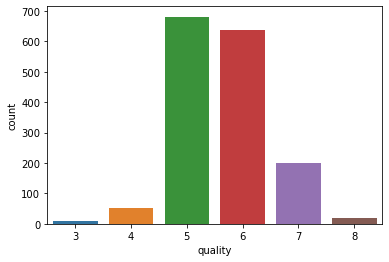

In [14]:
sns.countplot(df['quality'])
plt.show()

<AxesSubplot:xlabel='quality', ylabel='Density'>

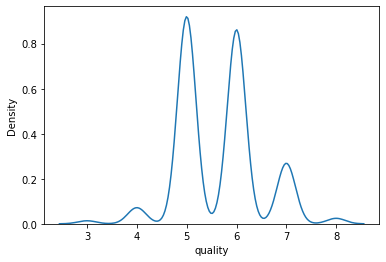

In [13]:
sns.kdeplot(df.query('quality > 2').quality)

In [15]:
#We can observe that the values 6, 5 broadly impact the target variable

In [16]:
df['quality'].value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [17]:
# PH represents the acidity and alkalinity of the solution. We can observe from the graph 
# that the majority of the values are concentrated at the center.

C:\Users\syd\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


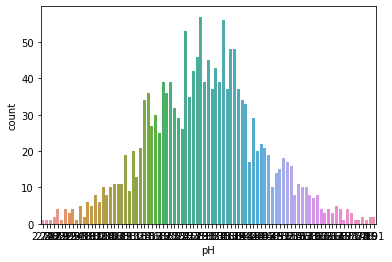

In [10]:
sns.countplot(df['pH'])
plt.show()

In [18]:
# We can observe from the graph that the majority of the alcohol values are concentrated between the values 8-11 
# and are slowly decreasing.

C:\Users\syd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

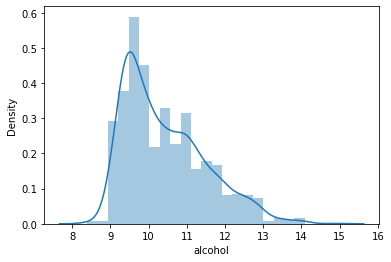

In [14]:
sns.distplot(df['alcohol'])

C:\Users\syd\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


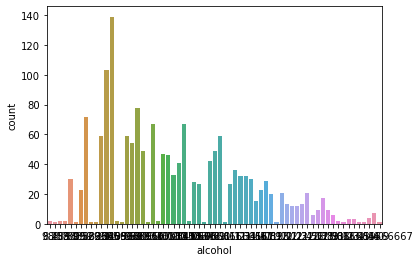

In [11]:
sns.countplot(df['alcohol'])
plt.show()

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

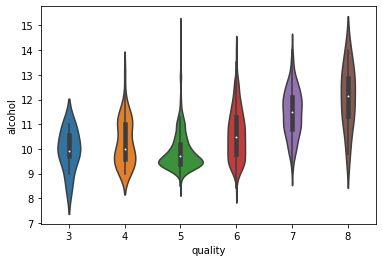

In [17]:
sns.violinplot(x='quality', y='alcohol', data=df)

In [19]:
# Acids contribute significantly to the taste of the wine. 
# The predominant acids found in the wine are tartaric, malic, citric, and succinic. 
# We can observe from the graph that the majority of the values are concentrated at the center.


C:\Users\syd\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


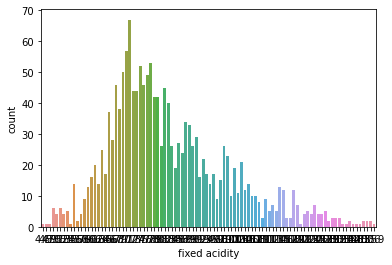

In [12]:
sns.countplot(df['fixed acidity'])
plt.show()

fixed acidity               AxesSubplot(0.125,0.71587;0.168478x0.16413)
volatile acidity         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
citric acid              AxesSubplot(0.529348,0.71587;0.168478x0.16413)
residual sugar           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chlorides                  AxesSubplot(0.125,0.518913;0.168478x0.16413)
free sulfur dioxide     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
total sulfur dioxide    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
density                 AxesSubplot(0.731522,0.518913;0.168478x0.16413)
pH                         AxesSubplot(0.125,0.321957;0.168478x0.16413)
sulphates               AxesSubplot(0.327174,0.321957;0.168478x0.16413)
alcohol                 AxesSubplot(0.529348,0.321957;0.168478x0.16413)
quality                 AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

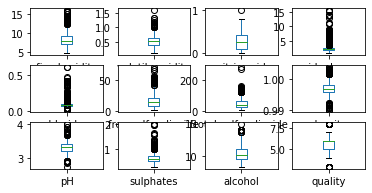

In [15]:
df.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

In [20]:
# Pair plots show all single-variable distributions and correlations between two variables. 
# Pair plots are an excellent method to identify trends for analysis.

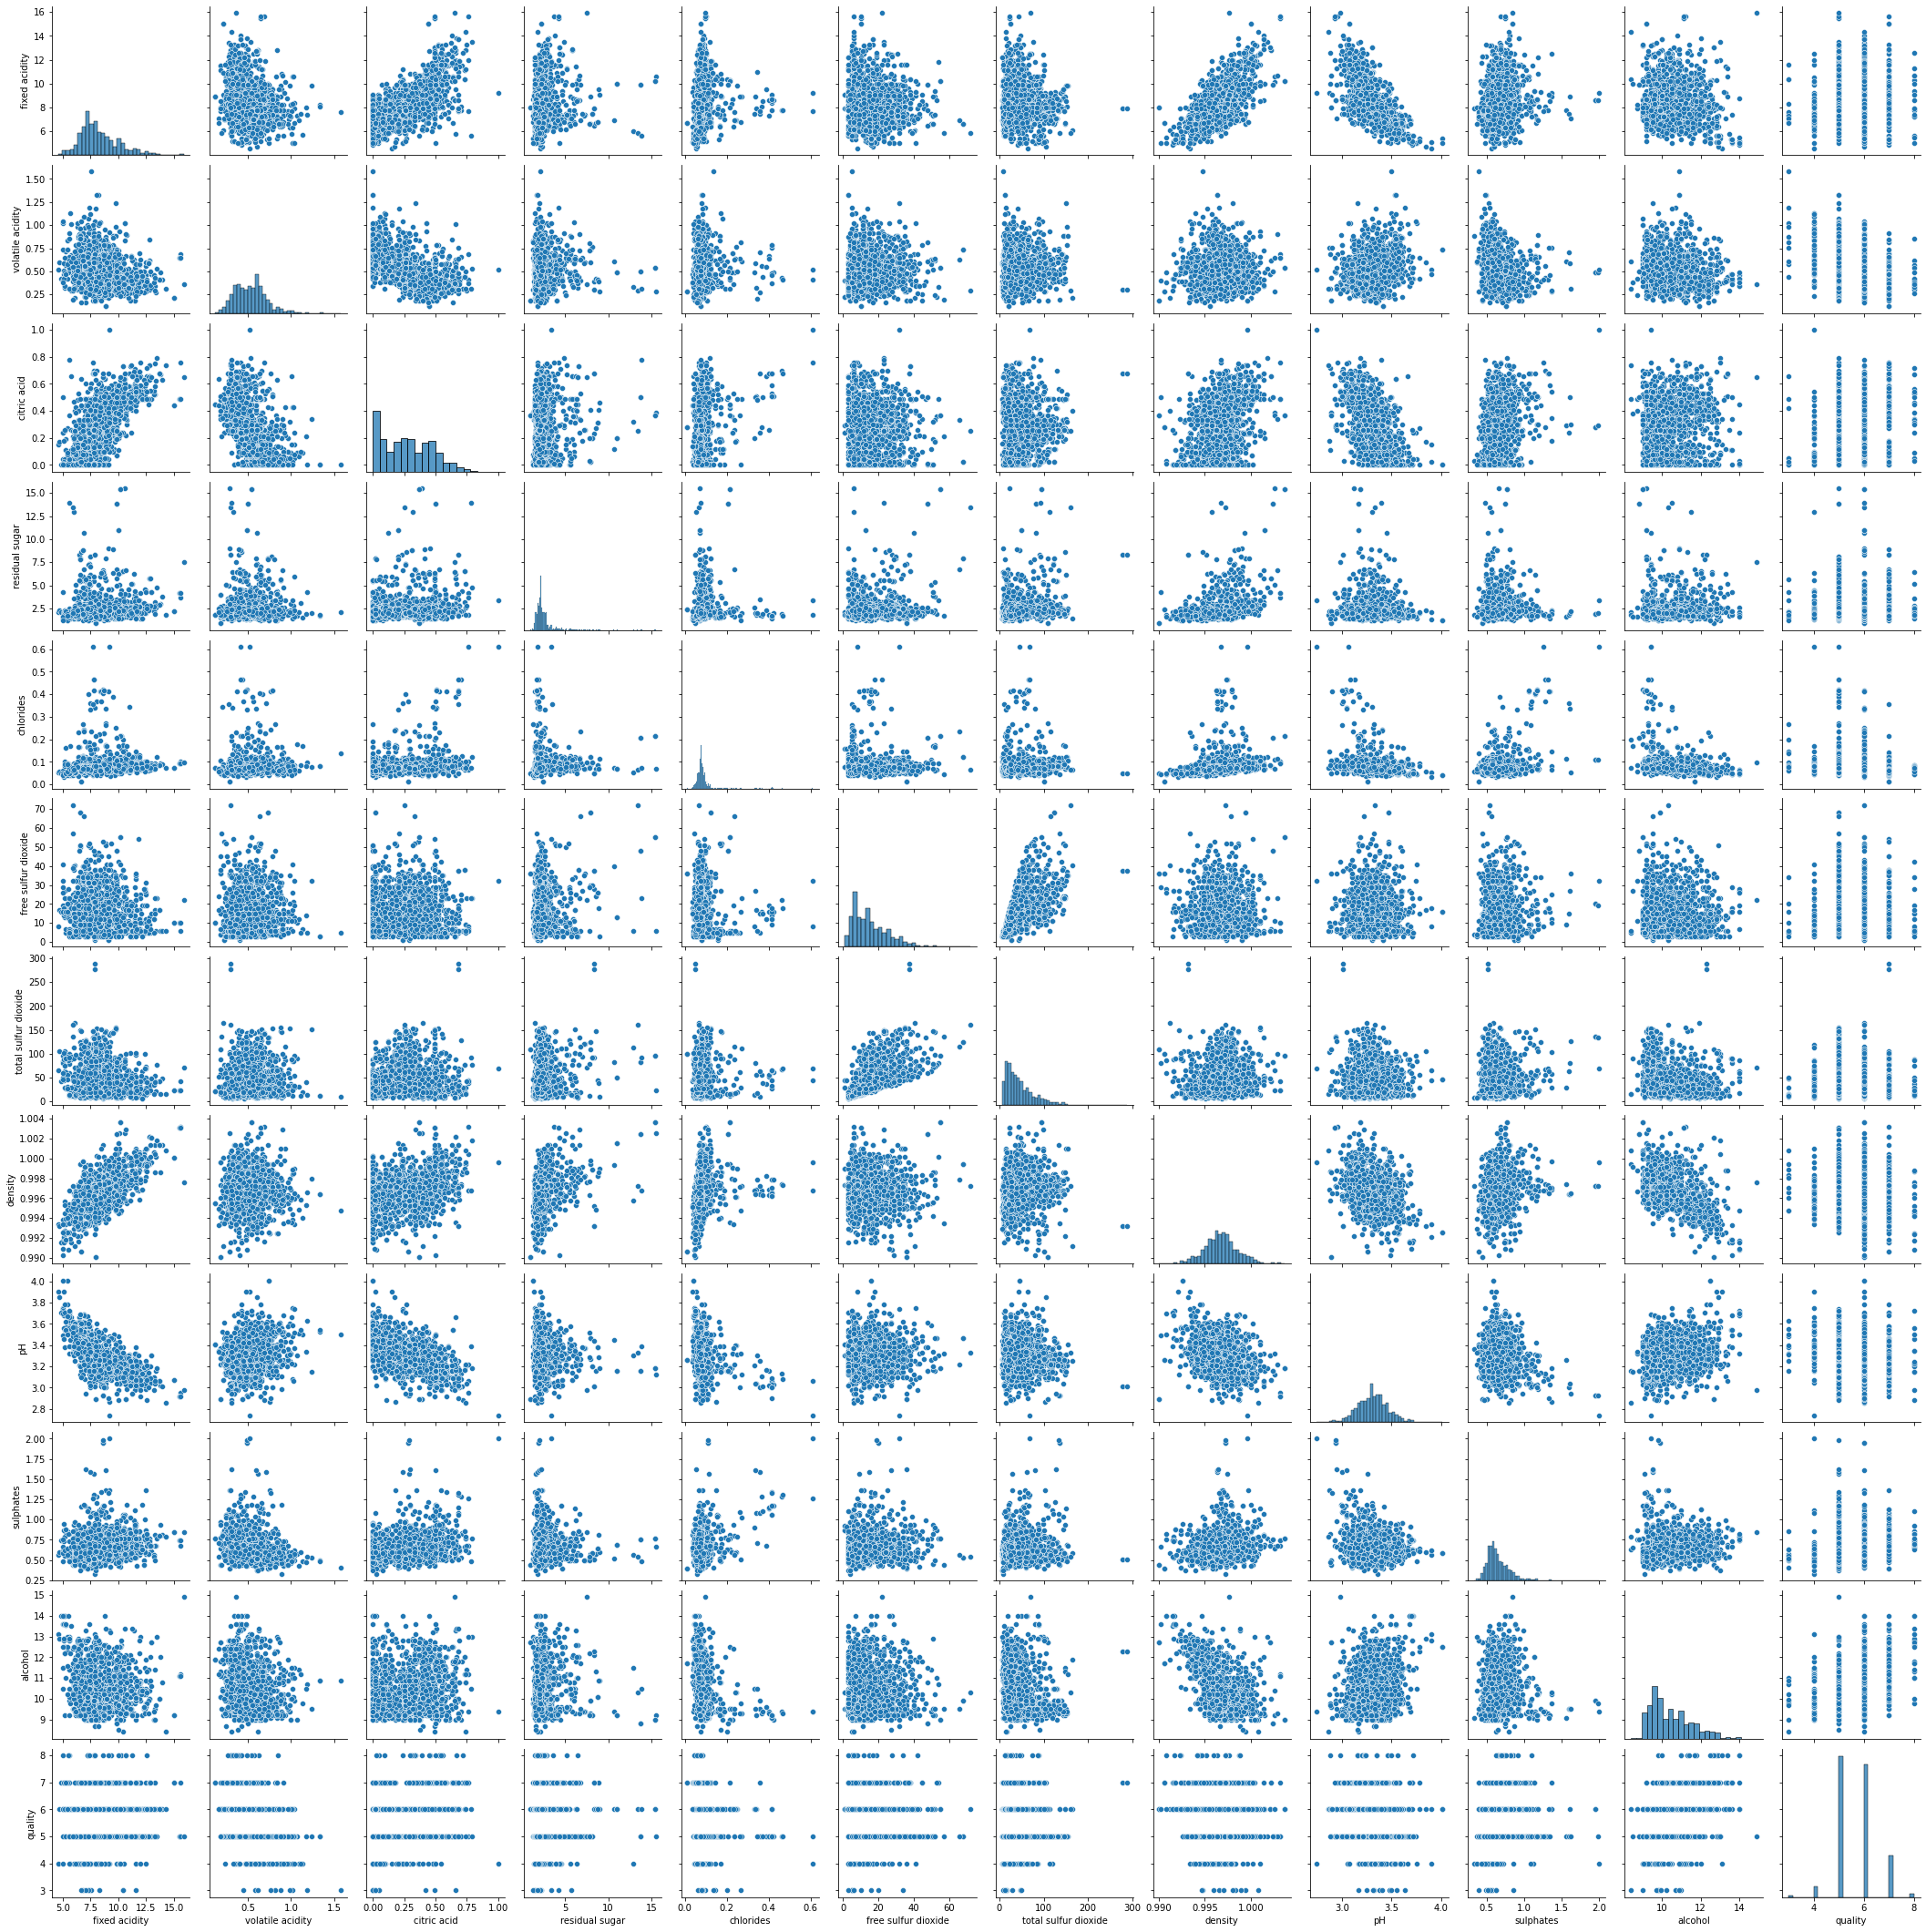

In [16]:
sns.pairplot(df)

In [21]:
# Correlation between the features. The correlation matrix between variables gives the 
# number of the features that are either dependent or independent on each other and the target variable.

<AxesSubplot:>

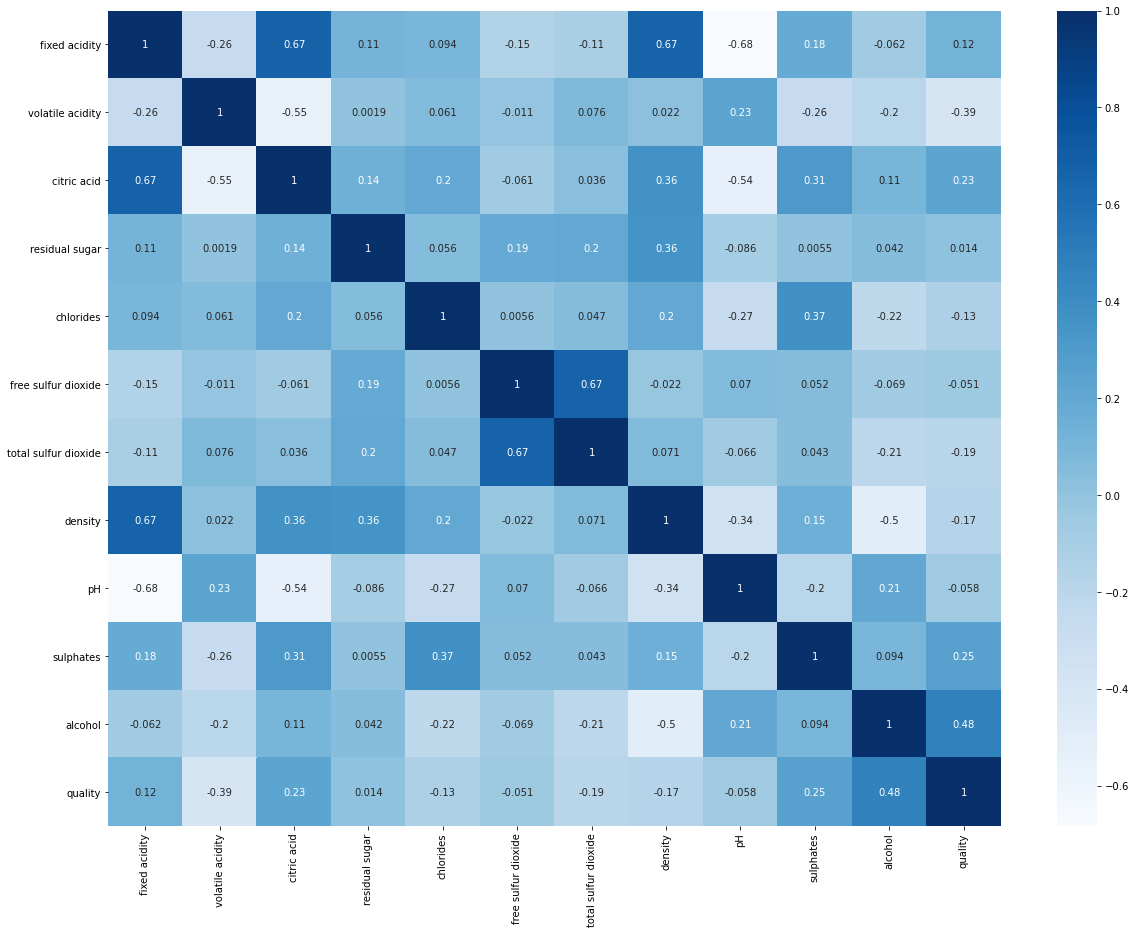

In [18]:
plt.figure(figsize=(20,15))
corr_df = df[df.columns].corr()
sns.heatmap(corr_df, cmap="Blues", annot = True)

In [ ]:
# Correlation	Feature
# Strong positive 	No
# Moderate positive 	Total sulphur dioxide and free sulphur dioxide (0.67), 
#                        fixed acidity and citric acid (0.67), 
#                        density and fixed acidity (0.67)
# Strong negative 	Alcohol and density (-0.5)

In [ ]:
# Generally, correlated features do not improve models (but it always depends on the problem at hand).
# However, they affect specific models in different ways and to varying extents.
# We have written a function that traverses through the correlation matrix 
# and stores the fe# Correlation	Feature


In [24]:
def correlation_high(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold and (corr_matrix.columns[j] not in col_corr): # we are interested in absolute coeff value, check for non abs values too
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [167]:
# After thorough research, we have finalized to set the threshold to be 90%.
#Surprisingly we found the none of the values have a higher correlation between each other. 

In [168]:
corr_features = correlation_high(df, 0.9)
len(set(corr_features))

0

In [166]:
corr_features

set()

In [ ]:
# The quantitative measurement of clusters across various values is referred to as cluster mapping. 
# Cluster categories are represented as groups that are connected by localized spill-overs and linkages. 

In [28]:
# We can observe from the figure that fixed acidity, citric acid, chlorides, residual sugar, 
# density, free sulfur dioxide, and total sulfur dioxide come under one cluster.
# On the other hand, alcohol, pH, volatile acidity, and sulfates fall under a second cluster.

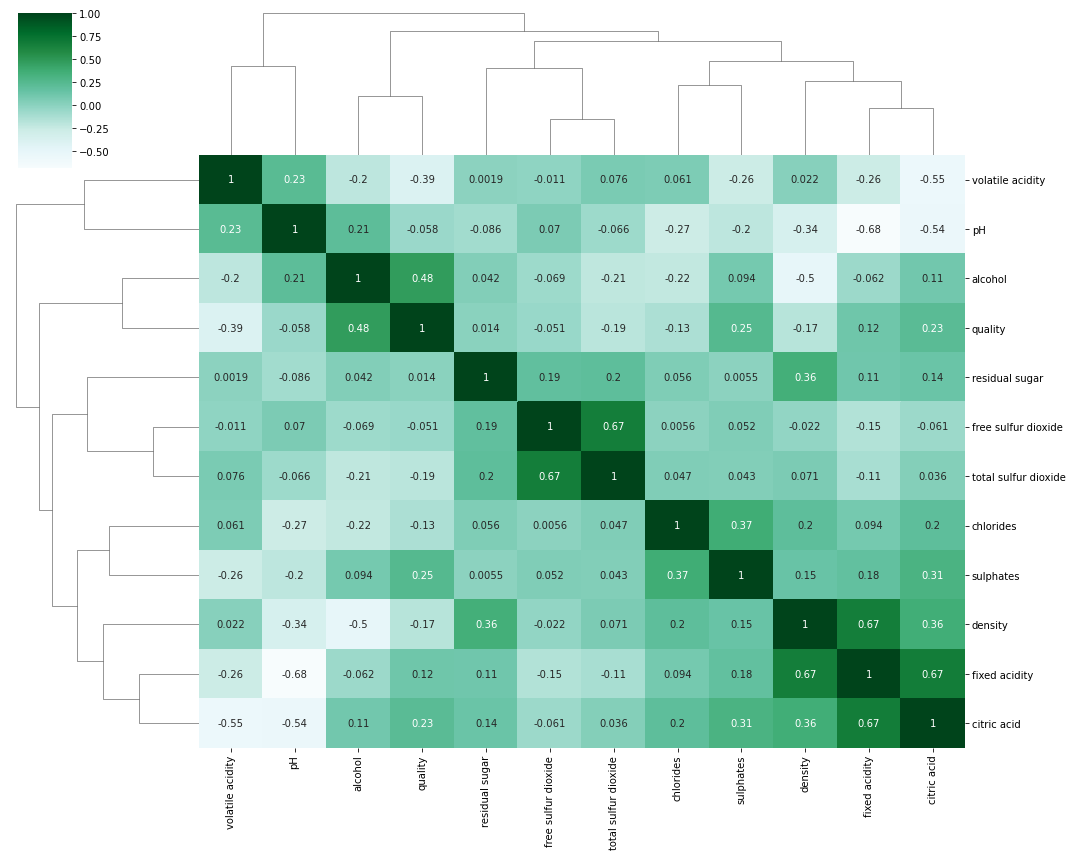

In [29]:
sns.clustermap(df.corr(), figsize=(15,12), cmap="BuGn",annot=True)

In [30]:
# We have performed the binary classification on the quality of the wine and categorized it as 
# class 0 - to all the values whose quality is greater than seven and class 1 to values less than 7.

In [31]:
def isTasty(quality):
    if quality >= 7:
        return 1
    else:
        return 0


In [32]:
df['tasty'] = df['quality'].apply(isTasty)

In [34]:
df['tasty'].value_counts()

0    1382
1     217
Name: tasty, dtype: int64

C:\Users\syd\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


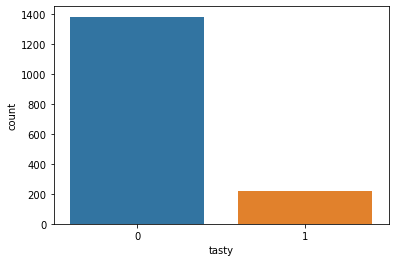

In [35]:
sns.countplot(df['tasty'])
plt.show()

In [37]:
data = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
target = df['tasty']

In [38]:
# The process of filtering and screening the input variables to reduce the size 
# and computation cost involved in developing a good prediction model is considered as feature importance.

In [39]:
# We have used the computed correlation function, L1,l2 regularization, 
# ExtraTreesClassifier and found promising results while using the correlation function and 
# ExtraTreesClassifier for the dataset we have considered.

The values for the features are :
 [0.07713569 0.09948026 0.09201721 0.07375053 0.06777061 0.06644375
 0.08771078 0.08331269 0.06953686 0.10802986 0.17481175]


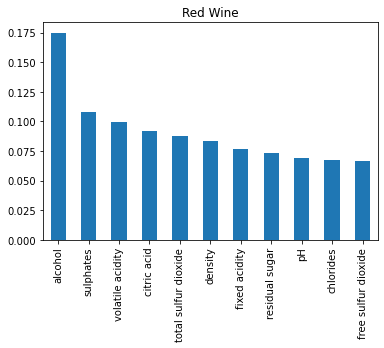

In [41]:
# Feature Importance 
model = ExtraTreesClassifier()
model.fit(data,target)
print("The values for the features are :\n", model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=data.columns)
feat_importances.nlargest(23).plot(kind='bar')
plt.title('Red Wine')
plt.show()

In [ ]:
# Data Visualisation b/w most important feature alcohol and target values - quality

Text(0.5, 1.0, 'alcohol v/s target\n')

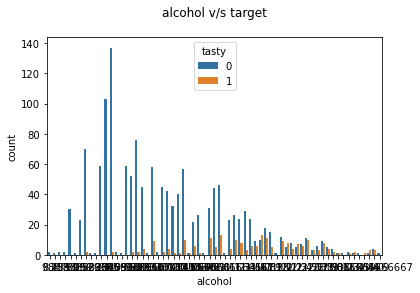

In [42]:
df_vis = df.copy()
sns.countplot(data= df_vis, x='alcohol',hue='tasty')
plt.title('alcohol v/s target\n')

Text(0.5, 1.0, 'sulphates v/s target\n')

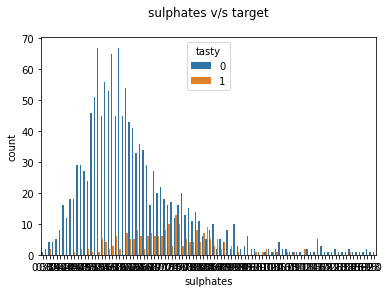

In [46]:
# Data Visualiation b/w sulphates and target values
df_vis = df.copy()
sns.countplot(data= df_vis, x='sulphates',hue='tasty')
plt.title('sulphates v/s target\n')

In [47]:
# Spliting the dataset to traget and test data

In [48]:
data_train, data_test, target_train, target_test = train_test_split(data,target,test_size = 0.33,random_state=123)

In [49]:
[subset.shape for subset in [data_train,data_test,target_train,target_test]]

[(1071, 11), (528, 11), (1071,), (528,)]

In [50]:
simpleTree = DecisionTreeClassifier(max_depth=5)

In [51]:
simpleTree.fit(data_train,target_train)

DecisionTreeClassifier(max_depth=5)

In [52]:
gbmTree = GradientBoostingClassifier(max_depth=5)

In [53]:
gbmTree.fit(data_train,target_train)

GradientBoostingClassifier(max_depth=5)

In [54]:
rfTree = RandomForestClassifier(max_depth=5)

In [55]:
rfTree.fit(data_train,target_train)

RandomForestClassifier(max_depth=5)

In [56]:
# K Nearest neighbors
knn = KNeighborsClassifier()
knn.fit(data_train, target_train)

KNeighborsClassifier()

In [57]:
#DTC
dtf = DecisionTreeClassifier().fit(data_train, target_train)

In [58]:
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(data_train, target_train)

LinearDiscriminantAnalysis()

In [59]:
# Logistic regression 

logreg = LogisticRegression()
logreg.fit(data_train, target_train)

C:\Users\syd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [60]:
simpleTreePerformance = precision_recall_fscore_support(target_test,simpleTree.predict(data_test))

In [61]:
gbmTreePerformance = precision_recall_fscore_support(target_test,gbmTree.predict(data_test))

In [62]:
rfTreePerformance = precision_recall_fscore_support(target_test,rfTree.predict(data_test))

In [63]:
knnperformance = precision_recall_fscore_support(target_test,knn.predict(data_test))

In [64]:
dtfperformance = precision_recall_fscore_support(target_test,dtf.predict(data_test))

In [65]:
ldaperformance = precision_recall_fscore_support(target_test,lda.predict(data_test))

In [66]:
logregperformance = precision_recall_fscore_support(target_test,logreg.predict(data_test))

In [68]:
# True Positive (TP): Predicted positive for an actual positive value.
# True Negative (TN): Predicted negative for an actual negative value.
# False Positive (FN): Predicted positive for an actual negative value.
# False Negative (FN): Predicted negative for an actual positive value.


In [69]:
# Precision: It’s the ratio between the correct positives to the total positive predictions.
# Precision=TP/(TP+FP)
# Recall: It’s the ratio between the correct positives and samples that should be positive. 
# Recall=  TP/(TP+FN)
# F-scores: Measures the model's accuracy on the datasets. It is the harmonic mean between precision and recall.
# F1-scores=(2*precision*recall)/(precision+recall)

In [67]:
print('Precision, Recall, Fscore, and Support for each class in simpleTree, gradient boosted, and random forest tree classifiers:'+'\n')
for treeMethod in [simpleTreePerformance, gbmTreePerformance, rfTreePerformance, knnperformance, dtfperformance, ldaperformance, logregperformance]:
    print('Precision: ',treeMethod[0])
    print('Recall: ',treeMethod[1])
    print('Fscore: ',treeMethod[2])
    print('Support: ',treeMethod[3],'\n')

Precision, Recall, Fscore, and Support for each class in simpleTree, gradient boosted, and random forest tree classifiers:

Precision:  [0.94771242 0.66666667]
Recall:  [0.94978166 0.65714286]
Fscore:  [0.94874591 0.6618705 ]
Support:  [458  70] 

Precision:  [0.93432203 0.69642857]
Recall:  [0.9628821  0.55714286]
Fscore:  [0.9483871  0.61904762]
Support:  [458  70] 

Precision:  [0.90763052 0.8       ]
Recall:  [0.98689956 0.34285714]
Fscore:  [0.94560669 0.48      ]
Support:  [458  70] 

Precision:  [0.88981289 0.36170213]
Recall:  [0.93449782 0.24285714]
Fscore:  [0.91160809 0.29059829]
Support:  [458  70] 

Precision:  [0.93668122 0.58571429]
Recall:  [0.93668122 0.58571429]
Fscore:  [0.93668122 0.58571429]
Support:  [458  70] 

Precision:  [0.91078838 0.58695652]
Recall:  [0.95851528 0.38571429]
Fscore:  [0.93404255 0.46551724]
Support:  [458  70] 

Precision:  [0.88844622 0.53846154]
Recall:  [0.97379913 0.2       ]
Fscore:  [0.92916667 0.29166667]
Support:  [458  70] 



In [70]:
# Accuracy: Accuracy is the performance metric of the machine learning model and is defines as the percentage of 
#correctness in the predicted value of the test data. 
#In other words it’s the ratio between the correct predictions to total number of predictions.  

# Accuracy=(TP+TN)/(TP+FP+TN+FN)


In [71]:
print('Accuracy of simpleTree classifier on training set: {:.2f}'
     .format(simpleTree.score(data_train, target_train)))
print('Accuracy of simpleTree classifier on test set: {:.2f}'
     .format(simpleTree.score(data_test, target_test)))
Accuracy_score = []
Accuracy_score.append(simpleTree.score(data_test, target_test))

Accuracy of simpleTree classifier on training set: 0.92
Accuracy of simpleTree classifier on test set: 0.91


In [72]:
print('Feature Importances for GBM tree\n')
for importance,feature in zip(gbmTree.feature_importances_,['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']):
    print('{}: {}'.format(feature,importance))

Feature Importances for GBM tree

fixed acidity: 0.07911228994166614
volatile acidity: 0.10494259602097293
citric acid: 0.0643020050200275
residual sugar: 0.06668655280465367
chlorides: 0.03725709025964206
free sulfur dioxide: 0.07166360655851696
total sulfur dioxide: 0.11613832803256645
density: 0.070966865024906
pH: 0.03721705910039522
sulphates: 0.11632228019513406
alcohol: 0.2353913270415192


In [73]:
#The Importance score in decreasing order, and we found that alcohol has the highest score.
# Features	Score
# pH	0.037217059
# chlorides	0.03725709
# citric acid	0.064302005
# residual sugar	0.066686553
# density	0.070966865
# free sulfur dioxide	0.071663607
# fixed acidity	0.07911229
# volatile acidity	0.104942596
# total sulfur dioxide	0.116138328
# sulphates	0.11632228
# alcohol	0.235391327


In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
import scikitplot as skplt

In [77]:
# Area under ROC curve (AUC): Measures the two-dimensional area under the ROC curve and the value ranges from 0 to1. 
# AUC is a metric that averages the overall classification thresholds performance. 
# The likelihood that the model scores a random positive example higher than a random negative example is one way to view AUC.
# AUC is classification-threshold-invariant-
# It assesses the accuracy of the model's predictions regardless of the classification threshold used.
# AUC is scale-invariant- Rather than measuring absolute values, it assesses how well predictions are ranked.


In [78]:
# Calculating the roc_auc score
roc_auc_score(target_test, simpleTree.predict(data_test))
roc_auc_score_list =[]
roc_auc_score_list.append(roc_auc_score(target_test, simpleTree.predict(data_test))) 
#del roc_auc_score

In [79]:
prdt_proba_simpletree = simpleTree.predict_proba(data_test)
prdt_proba_simpletree

array([[0.19565217, 0.80434783],
       [0.99182561, 0.00817439],
       [0.99182561, 0.00817439],
       ...,
       [0.99182561, 0.00817439],
       [0.99182561, 0.00817439],
       [0.4       , 0.6       ]])

In [80]:
# ROC stands for receiver operating characteristic curve. It graphs the performance of the model at all the classification thresholds.
# The two parameters involved are
# True Positive Rate is the recall.
# Recall→True Positive Rate =  TP/(TP+FN)
# False Positive Rate FPR is a count of incorrect positive results that occur among all negative samples during the test.
# False Positive Rate(FPR)=  FP/(FP+TN)


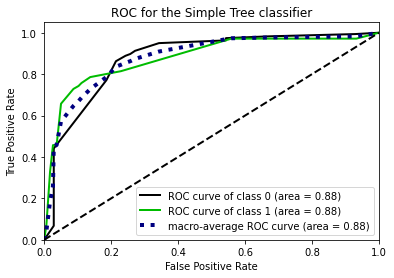

In [169]:
skplt.metrics.plot_roc(target_test, prdt_proba_simpletree, plot_micro=False)
plt.title("ROC for the Simple Tree classifier")
plt.show()

In [82]:
# Calculating the roc_auc for class of good wine
good_red_wine = prdt_proba_simpletree[:,1]
fpr, tpr, thresholds = roc_curve(target_test, good_red_wine)
roc_auc = auc(fpr, tpr)
print("The value of the Area under ROC curve is :", roc_auc)
roc_auc_list = []
roc_auc_list.append(roc_auc)

The value of the Area under ROC curve is : 0.8790081097941359


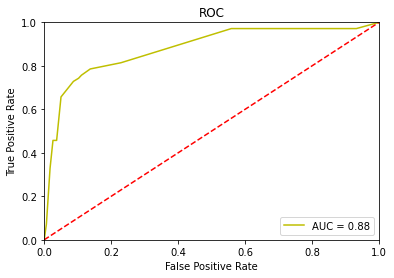

In [83]:
plt.title('ROC')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

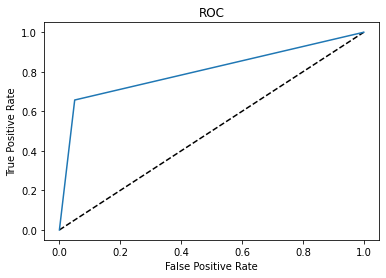

In [84]:
#ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(target_test, simpleTree.predict(data_test))
plt.plot([0,1], [0,1], '--k')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [85]:
#pip install scikit-plot

In [86]:
print('Accuracy of gradb classifier on training set: {:.2f}'
     .format(gbmTree.score(data_train, target_train)))
print('Accuracy of gradb classifier on test set: {:.2f}'
     .format(gbmTree.score(data_test, target_test)))
Accuracy_score.append(gbmTree.score(data_test, target_test))

Accuracy of gradb classifier on training set: 1.00
Accuracy of gradb classifier on test set: 0.91


In [87]:
# Calculating the roc_auc score
roc_auc_score(target_test, gbmTree.predict(data_test))
roc_auc_score_list.append(roc_auc_score(target_test, gbmTree.predict(data_test)))

In [88]:
prdt_proba_gbmTree = gbmTree.predict_proba(data_test)
prdt_proba_gbmTree

array([[0.08873462, 0.91126538],
       [0.99861403, 0.00138597],
       [0.99848481, 0.00151519],
       ...,
       [0.99745503, 0.00254497],
       [0.99704438, 0.00295562],
       [0.37921152, 0.62078848]])

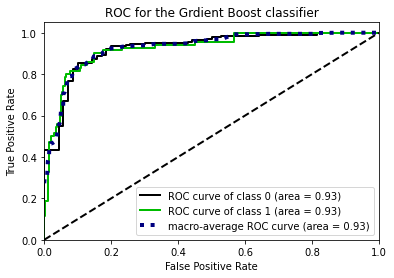

In [170]:
skplt.metrics.plot_roc(target_test, prdt_proba_gbmTree, plot_micro=False)
plt.title("ROC for the Grdient Boost classifier")
plt.show()

In [90]:
good_red_wine = prdt_proba_gbmTree[:,1]
fpr, tpr, thresholds = roc_curve(target_test, good_red_wine)
roc_auc = auc(fpr, tpr)
print("The value of the Area under ROC curve is :", roc_auc)
roc_auc_list.append(roc_auc)

The value of the Area under ROC curve is : 0.9268870867124143


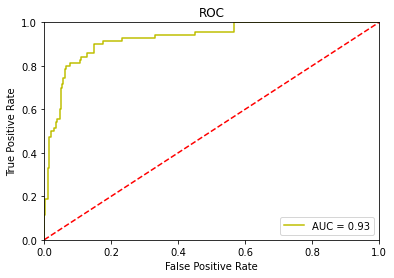

In [91]:
plt.title('ROC')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

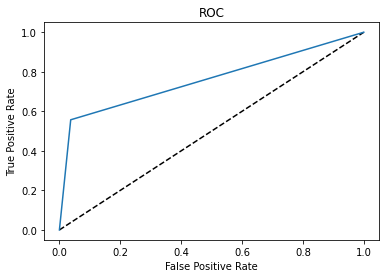

In [92]:
#ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(target_test, gbmTree.predict(data_test))
plt.plot([0,1], [0,1], '--k')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [93]:
print('Accuracy of rfTree classifier on training set: {:.2f}'
     .format(rfTree.score(data_train, target_train)))
print('Accuracy of rfTree classifier on test set: {:.2f}'
     .format(rfTree.score(data_test, target_test)))
Accuracy_score.append(rfTree.score(data_test, target_test))

Accuracy of rfTree classifier on training set: 0.92
Accuracy of rfTree classifier on test set: 0.90


In [94]:
# Calculating the roc_auc score
roc_auc_score(target_test, rfTree.predict(data_test))
roc_auc_score_list.append(roc_auc_score(target_test, rfTree.predict(data_test)))

In [95]:
prdt_proba_rfTree = rfTree.predict_proba(data_test)
prdt_proba_rfTree

array([[0.53121399, 0.46878601],
       [0.99017206, 0.00982794],
       [0.98664223, 0.01335777],
       ...,
       [0.98776046, 0.01223954],
       [0.95304424, 0.04695576],
       [0.68253101, 0.31746899]])

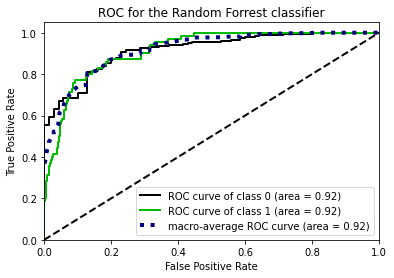

In [171]:
skplt.metrics.plot_roc(target_test, prdt_proba_rfTree, plot_micro=False)
plt.title("ROC for the Random Forrest classifier")
plt.show()

In [97]:
good_red_wine = prdt_proba_rfTree[:,1]
fpr, tpr, thresholds = roc_curve(target_test, good_red_wine)
roc_auc = auc(fpr, tpr)
print("The value of the Area under ROC curve is :", roc_auc)
roc_auc_list.append(roc_auc)

The value of the Area under ROC curve is : 0.9165626949469745


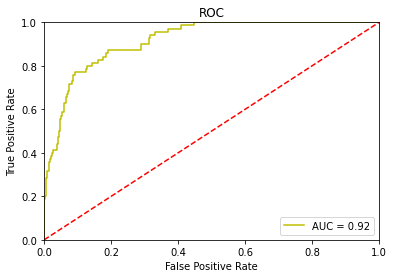

In [98]:
plt.title('ROC')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

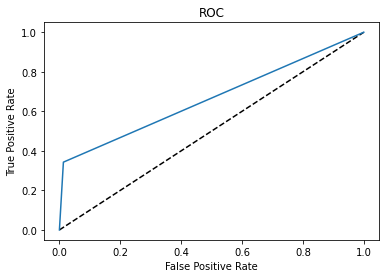

In [99]:
#ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(target_test, rfTree.predict(data_test))
plt.plot([0,1], [0,1], '--k')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [100]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(data_train, target_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(data_test, target_test)))
Accuracy_score.append(knn.score(data_test, target_test))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.84


In [101]:
# Calculating the roc_auc score
roc_auc_score(target_test, knn.predict(data_test))
roc_auc_score_list.append(roc_auc_score(target_test, knn.predict(data_test)))

In [102]:
prdt_proba_knn = knn.predict_proba(data_test)
prdt_proba_knn

array([[0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2]])

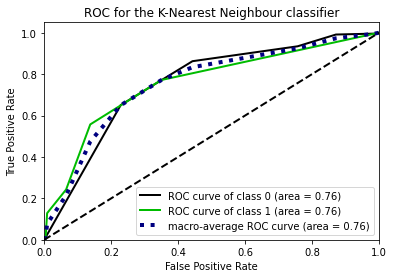

In [172]:
skplt.metrics.plot_roc(target_test, prdt_proba_knn, plot_micro=False)
plt.title("ROC for the K-Nearest Neighbour classifier")
plt.show()

In [104]:
good_red_wine = prdt_proba_knn[:,1]
fpr, tpr, thresholds = roc_curve(target_test, good_red_wine)
roc_auc = auc(fpr, tpr)
print("The value of the Area under ROC curve is :", roc_auc)
roc_auc_list.append(roc_auc)

The value of the Area under ROC curve is : 0.7566905801621959


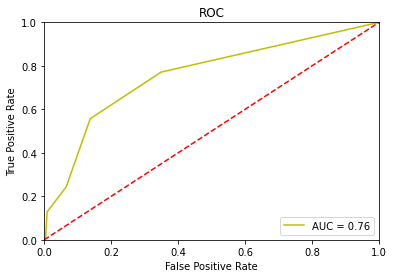

In [105]:
plt.title('ROC')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

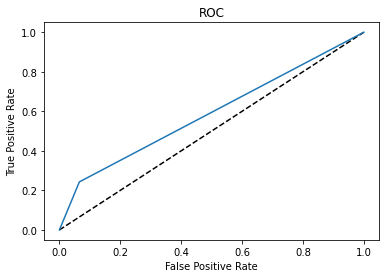

In [106]:

#ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(target_test, knn.predict(data_test))
plt.plot([0,1], [0,1], '--k')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [107]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtf.score(data_train, target_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtf.score(data_test, target_test)))
Accuracy_score.append(dtf.score(data_test, target_test))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.89


In [108]:
# Calculating the roc_auc score
roc_auc_score(target_test, dtf.predict(data_test))
roc_auc_score_list.append(roc_auc_score(target_test, dtf.predict(data_test)))

In [109]:
prdt_proba_dtf = dtf.predict_proba(data_test)
prdt_proba_dtf

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

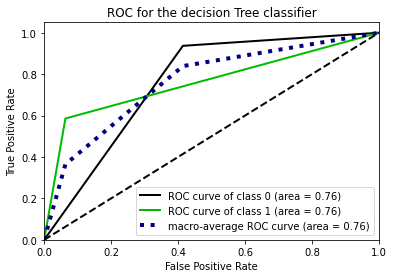

In [173]:
skplt.metrics.plot_roc(target_test, prdt_proba_dtf, plot_micro=False)
plt.title("ROC for the decision Tree classifier")
plt.show()

In [111]:
good_red_wine = prdt_proba_dtf[:,1]
fpr, tpr, thresholds = roc_curve(target_test, good_red_wine)
roc_auc = auc(fpr, tpr)
print("The value of the Area under ROC curve is :", roc_auc)
roc_auc_list.append(roc_auc)

The value of the Area under ROC curve is : 0.7611977542108548


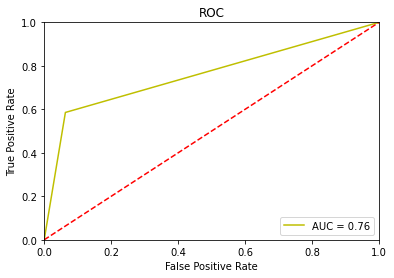

In [112]:
plt.title('ROC')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

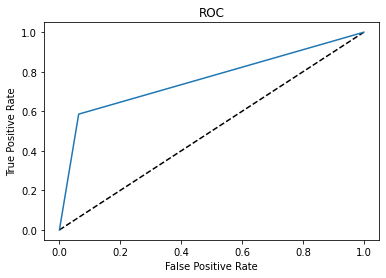

In [113]:
#ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(target_test, dtf.predict(data_test))
plt.plot([0,1], [0,1], '--k')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [114]:
# Linear Discriminant Analysis
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(data_train, target_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(data_test, target_test)))
Accuracy_score.append(lda.score(data_test, target_test))

Accuracy of LDA classifier on training set: 0.87
Accuracy of LDA classifier on test set: 0.88


In [115]:
# Calculating the roc_auc score
roc_auc_score(target_test, lda.predict(data_test))
roc_auc_score_list.append(roc_auc_score(target_test, lda.predict(data_test)))

In [116]:
prdt_proba_lda = lda.predict_proba(data_test)
prdt_proba_lda

array([[0.44185057, 0.55814943],
       [0.99233587, 0.00766413],
       [0.99673085, 0.00326915],
       ...,
       [0.99300331, 0.00699669],
       [0.97438835, 0.02561165],
       [0.77587278, 0.22412722]])

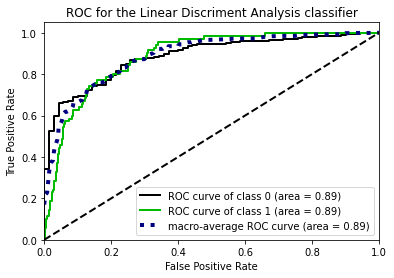

In [175]:
skplt.metrics.plot_roc(target_test, prdt_proba_lda, plot_micro=False)
plt.title("ROC for the Linear Discriment Analysis classifier")
plt.show()

In [118]:
good_red_wine = prdt_proba_lda[:,1]
fpr, tpr, thresholds = roc_curve(target_test, good_red_wine)
roc_auc = auc(fpr, tpr)
print("The value of the Area under ROC curve is :", roc_auc)
roc_auc_list.append(roc_auc)

The value of the Area under ROC curve is : 0.8864004990642546


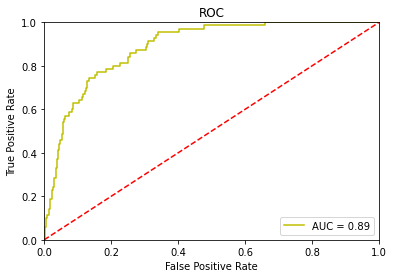

In [119]:
plt.title('ROC')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

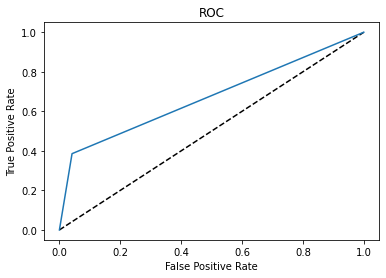

In [120]:
#ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(target_test, lda.predict(data_test))
plt.plot([0,1], [0,1], '--k')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [121]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(data_train, target_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(data_test, target_test)))
Accuracy_score.append(logreg.score(data_test, target_test))

Accuracy of Logistic regression classifier on training set: 0.88
Accuracy of Logistic regression classifier on test set: 0.87


In [122]:
# Calculating the roc_auc score
roc_auc_score(target_test, logreg.predict(data_test))
roc_auc_score_list.append(roc_auc_score(target_test, logreg.predict(data_test)))

In [123]:
prdt_proba_logreg = logreg.predict_proba(data_test)
prdt_proba_logreg

array([[0.52246724, 0.47753276],
       [0.99223642, 0.00776358],
       [0.99168595, 0.00831405],
       ...,
       [0.98732359, 0.01267641],
       [0.95964812, 0.04035188],
       [0.79172095, 0.20827905]])

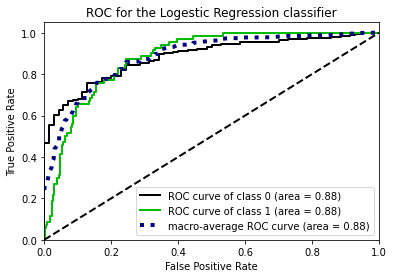

In [176]:
skplt.metrics.plot_roc(target_test, prdt_proba_logreg, plot_micro=False)
plt.title("ROC for the Logestic Regression classifier")
plt.show()

In [125]:

good_red_wine = prdt_proba_logreg[:,1]
fpr, tpr, thresholds = roc_curve(target_test, good_red_wine)
roc_auc = auc(fpr, tpr)
print("The value of the Area under ROC curve is :", roc_auc)
roc_auc_list.append(roc_auc)

The value of the Area under ROC curve is : 0.882345601996257


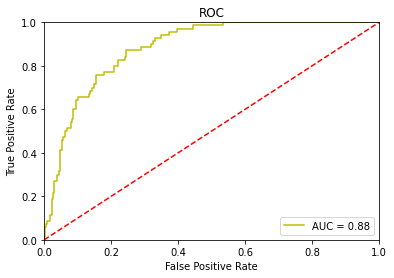

In [126]:
plt.title('ROC')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

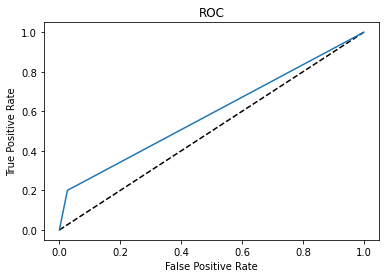

In [127]:
#ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(target_test, logreg.predict(data_test))
plt.plot([0,1], [0,1], '--k')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [128]:
print(len(Accuracy_score))
print(Accuracy_score)
#Accuracy_score.pop()

7
[0.9109848484848485, 0.9090909090909091, 0.9015151515151515, 0.8428030303030303, 0.8901515151515151, 0.8825757575757576, 0.8712121212121212]


In [148]:
model_names = ['SimpleTree', 'Gradient boosted', 'Random forest', 'K-nearest neighbour', 'Descision Tree', 'Linear Discriminanet Analysis', 'Logestic']
acc_dict = {}
acc_dict={'Modelling Algo':model_names,'Accuracy':Accuracy_score}
acc_dict

{'Modelling Algo': ['SimpleTree',
  'Gradient boosted',
  'Random forest',
  'K-nearest neighbour',
  'Descision Tree',
  'Linear Discriminanet Analysis',
  'Logestic'],
 'Accuracy': [0.9109848484848485,
  0.9090909090909091,
  0.9015151515151515,
  0.8428030303030303,
  0.8901515151515151,
  0.8825757575757576,
  0.8712121212121212]}

In [149]:
acc_frame=pd.DataFrame(acc_dict)
acc_frame

,Modelling Algo,Accuracy
0,SimpleTree,0.910985
1,Gradient boosted,0.909091
2,Random forest,0.901515
3,K-nearest neighbour,0.842803
4,Descision Tree,0.890152
5,Linear Discriminanet Analysis,0.882576
6,Logestic,0.871212


<AxesSubplot:xlabel='Accuracy', ylabel='Modelling Algo'>

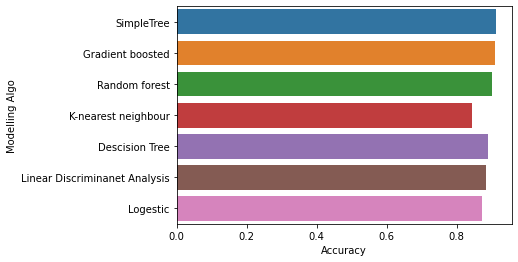

In [150]:
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

In [151]:
# We have found that the Simple Tree ad Gradient Boosted algorithm has the 
# maximum accuracy and the least accuracy is with the K-nearest neighbor.


C:\Users\syd\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\syd\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


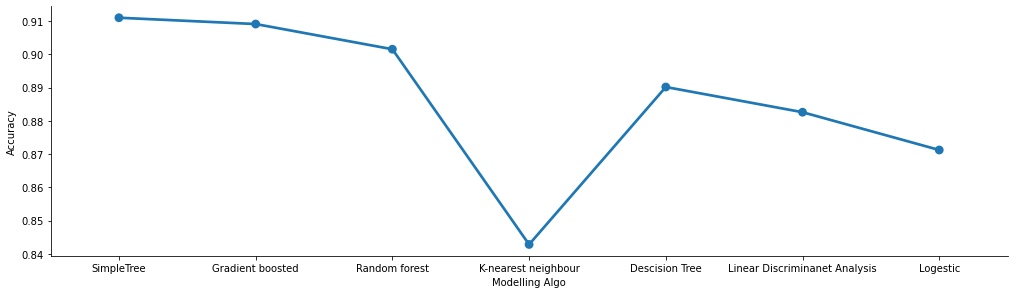

In [152]:
sns.factorplot(x='Modelling Algo',y='Accuracy',data=acc_frame,kind='point',size=4,aspect=3.5)

In [153]:
print(len(roc_auc_score_list))
print(roc_auc_score_list)

7
[0.8034622582657517, 0.7600124766063631, 0.6648783530879601, 0.5886774797255147, 0.7611977542108548, 0.6721147847785403, 0.5868995633187772]


In [154]:
roc_auc_score_dict = {}
roc_auc_score_dict={'Modelling Algo':model_names,'Roc_acu_score':roc_auc_score_list}
roc_auc_score_dict

{'Modelling Algo': ['SimpleTree',
  'Gradient boosted',
  'Random forest',
  'K-nearest neighbour',
  'Descision Tree',
  'Linear Discriminanet Analysis',
  'Logestic'],
 'Roc_acu_score': [0.8034622582657517,
  0.7600124766063631,
  0.6648783530879601,
  0.5886774797255147,
  0.7611977542108548,
  0.6721147847785403,
  0.5868995633187772]}

In [155]:
roc_auc_score_frame=pd.DataFrame(roc_auc_score_dict)
roc_auc_score_frame

,Modelling Algo,Roc_acu_score
0,SimpleTree,0.803462
1,Gradient boosted,0.760012
2,Random forest,0.664878
3,K-nearest neighbour,0.588677
4,Descision Tree,0.761198
5,Linear Discriminanet Analysis,0.672115
6,Logestic,0.586900


<AxesSubplot:xlabel='Roc_acu_score', ylabel='Modelling Algo'>

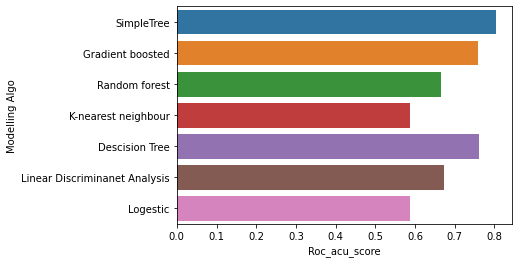

In [156]:
sns.barplot(y='Modelling Algo',x='Roc_acu_score',data=roc_auc_score_frame)

In [157]:
# We have found that the Simple Tree classifying algorithms have the maximum ROC_ACU score, 
# and the worst performance is with the Logistic Regression.

C:\Users\syd\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\syd\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


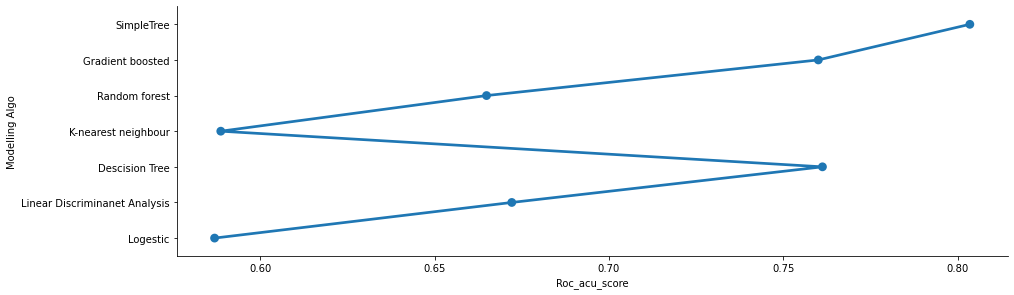

In [158]:
sns.factorplot(y='Modelling Algo',x='Roc_acu_score',data=roc_auc_score_frame,kind='point',size=4,aspect=3.5)

In [159]:
print(len(roc_auc_list))
print(roc_auc_list)

7
[0.8790081097941359, 0.9268870867124143, 0.9165626949469745, 0.7566905801621959, 0.7611977542108548, 0.8864004990642546, 0.882345601996257]


In [160]:
roc_auc_dict = {}
roc_auc_dict={'Modelling Algo':model_names,'Roc_acu':roc_auc_list}
roc_auc_dict

{'Modelling Algo': ['SimpleTree',
  'Gradient boosted',
  'Random forest',
  'K-nearest neighbour',
  'Descision Tree',
  'Linear Discriminanet Analysis',
  'Logestic'],
 'Roc_acu': [0.8790081097941359,
  0.9268870867124143,
  0.9165626949469745,
  0.7566905801621959,
  0.7611977542108548,
  0.8864004990642546,
  0.882345601996257]}

In [161]:
roc_auc_frame=pd.DataFrame(roc_auc_dict)
roc_auc_frame

,Modelling Algo,Roc_acu
0,SimpleTree,0.879008
1,Gradient boosted,0.926887
2,Random forest,0.916563
3,K-nearest neighbour,0.756691
4,Descision Tree,0.761198
5,Linear Discriminanet Analysis,0.886400
6,Logestic,0.882346


<AxesSubplot:xlabel='Roc_acu', ylabel='Modelling Algo'>

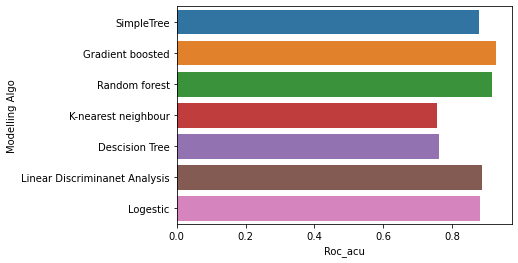

In [162]:
sns.barplot(y='Modelling Algo',x='Roc_acu',data=roc_auc_frame)

In [163]:
# We have found that the Gradient Boosted classifying algorithms have the maximum AUC value,
# and the worst performance is with the K-nearest neighbor.

C:\Users\syd\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\syd\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


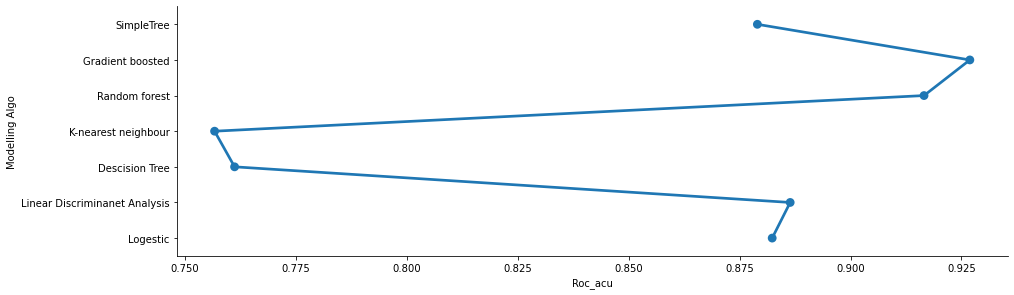

In [164]:
sns.factorplot(y='Modelling Algo',x='Roc_acu',data=roc_auc_frame,kind='point',size=4,aspect=3.5)